0.07153652220047733 0.7153652220047733 0.3978873577297383
0.07153652220047733 0.7153652220047733 0.3978873577297383


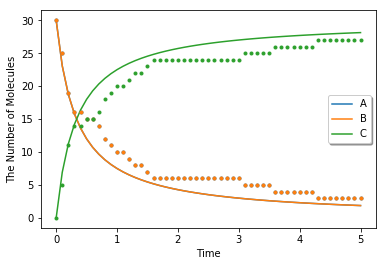

In [11]:
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ecell4 import *
from math import pi

def singlerun(L,r,D,ka,kr,dur,sim):
    R=r*2
    kd = 4*pi*R*D*2
    kon = ka*kd/(ka+kd)
    kD = ka/kr
    koff = kon/kD
    print(kon,koff,ka/kd)    
    Na=30
    Nb=30
    Nc=0   
    intrinsic=False
    intrinsic=True
    if sim=='spa': intrinsic=True
    #print(intrinsic)
    with species_attributes():
        A|B|C | {'radius': str(r), 'D': str(D)}

    with reaction_rules():
        A + B > C | (ka if intrinsic else kon)
        #C>A+B | (kr if intrinsic else koff)

    m = get_model()    
    if sim=='ode':
        w = ode.ODEWorld(Real3(L,L,L))
        w.bind_to(m)
        w.add_molecules(Species("A"), Na)
        w.add_molecules(Species("B"), Nb)
        w.add_molecules(Species("C"), Nc)
        sim = ode.ODESimulator(m,w)#simulator_type(m, w)
    else:
        voxelr = 1.0208582*r
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr)
        w.bind_to(m)
        w.add_molecules(Species("A"), Na)
        w.add_molecules(Species("B"), Nb)
        w.add_molecules(Species("C"), Nc)
        sim = spatiocyte.SpatiocyteSimulator(m, w)        
    obs = FixedIntervalNumberObserver(dur/50, ["A","B","C"])
    sim.run(dur, obs)
    return obs
    
r=0.05
dur=5
D=0.1
ka=0.1#9e3
kr=1.
L=1
obs1= singlerun(L,r,D,ka,kr,dur,'ode')
obs2 = singlerun(L,r,D,ka,kr,dur,'spa')
viz.plot_number_observer(obs1,'-',obs2,'.')